In [1]:
import pandas as pd
df = pd.read_csv("lifestyle_sustainability_data.csv")
df=df.drop("ParticipantID", axis=1)

In [2]:
df.columns

Index(['Age', 'Location', 'DietType', 'LocalFoodFrequency',
       'TransportationMode', 'EnergySource', 'HomeType', 'HomeSize',
       'ClothingFrequency', 'SustainableBrands', 'EnvironmentalAwareness',
       'CommunityInvolvement', 'MonthlyElectricityConsumption',
       'MonthlyWaterConsumption', 'Gender', 'UsingPlasticProducts',
       'DisposalMethods', 'PhysicalActivities', 'Rating'],
      dtype='object')

In [3]:
df.head()

,Age,Location,DietType,LocalFoodFrequency,TransportationMode,EnergySource,HomeType,HomeSize,ClothingFrequency,SustainableBrands,EnvironmentalAwareness,CommunityInvolvement,MonthlyElectricityConsumption,MonthlyWaterConsumption,Gender,UsingPlasticProducts,DisposalMethods,PhysicalActivities,Rating
0,35,Urban,Mostly Plant-Based,Often,Bike,Renewable,Apartment,800,Rarely,True,5,High,100,1500,Female,Rarely,Composting,High,5
1,28,Suburban,Balanced,Sometimes,Public Transit,Mixed,House,1500,Sometimes,True,4,Moderate,250,3000,Male,Sometimes,Recycling,Moderate,4
2,65,Rural,Mostly Animal-Based,Rarely,Car,Non-Renewable,House,2500,Often,False,2,Low,400,4500,Male,Often,Landfill,Low,1
3,42,Urban,Mostly Plant-Based,Often,Walk,Renewable,Apartment,950,Sometimes,True,4,Moderate,150,2000,Female,Rarely,Recycling,High,5
4,31,Suburban,Balanced,Sometimes,Public Transit,Mixed,House,1800,Often,True,3,Low,300,3500,Non-Binary,Sometimes,Combination,Moderate,3


In [4]:
df=df.drop(['Age','HomeSize','MonthlyElectricityConsumption',
       'MonthlyWaterConsumption'], axis=1)

In [5]:
df.head()

,Location,DietType,LocalFoodFrequency,TransportationMode,EnergySource,HomeType,ClothingFrequency,SustainableBrands,EnvironmentalAwareness,CommunityInvolvement,Gender,UsingPlasticProducts,DisposalMethods,PhysicalActivities,Rating
0,Urban,Mostly Plant-Based,Often,Bike,Renewable,Apartment,Rarely,True,5,High,Female,Rarely,Composting,High,5
1,Suburban,Balanced,Sometimes,Public Transit,Mixed,House,Sometimes,True,4,Moderate,Male,Sometimes,Recycling,Moderate,4
2,Rural,Mostly Animal-Based,Rarely,Car,Non-Renewable,House,Often,False,2,Low,Male,Often,Landfill,Low,1
3,Urban,Mostly Plant-Based,Often,Walk,Renewable,Apartment,Sometimes,True,4,Moderate,Female,Rarely,Recycling,High,5
4,Suburban,Balanced,Sometimes,Public Transit,Mixed,House,Often,True,3,Low,Non-Binary,Sometimes,Combination,Moderate,3


In [6]:
# this just converts the value of column to 0 or 1
# factorize in pandas works too, but only one column at a time
from sklearn.preprocessing import LabelEncoder
variables = ['SustainableBrands']
encoder = LabelEncoder()
df[variables] = df[variables].apply(encoder.fit_transform)

In [7]:
# this example is using the housing data from Moodle
varlist_three = ['CommunityInvolvement','PhysicalActivities']
varlist_four =  ['LocalFoodFrequency','ClothingFrequency','UsingPlasticProducts']


# Defining the map function
def binary_map_three(x):
    return x.map({'Low': 0, "Moderate":1, "High":2})
# Defining the map function
def binary_map_four(x):
    return x.map({'rarely': 0, "Sometimes":1, "Often":2, "Always":3})

# Applying the function to the housing list
df[varlist_three] = df[varlist_three].apply(binary_map_three)
df[varlist_four] = df[varlist_four].apply(binary_map_four)

In [8]:
df.head()

,Location,DietType,LocalFoodFrequency,TransportationMode,EnergySource,HomeType,ClothingFrequency,SustainableBrands,EnvironmentalAwareness,CommunityInvolvement,Gender,UsingPlasticProducts,DisposalMethods,PhysicalActivities,Rating
0,Urban,Mostly Plant-Based,2.0,Bike,Renewable,Apartment,NaN,1,5,2.0,Female,NaN,Composting,2.0,5
1,Suburban,Balanced,1.0,Public Transit,Mixed,House,1.0,1,4,1.0,Male,1.0,Recycling,1.0,4
2,Rural,Mostly Animal-Based,NaN,Car,Non-Renewable,House,2.0,0,2,0.0,Male,2.0,Landfill,0.0,1
3,Urban,Mostly Plant-Based,2.0,Walk,Renewable,Apartment,1.0,1,4,1.0,Female,NaN,Recycling,2.0,5
4,Suburban,Balanced,1.0,Public Transit,Mixed,House,2.0,1,3,0.0,Non-Binary,1.0,Combination,1.0,3


In [9]:
# this makes multiple columns with the variable (Separate for yes/no)
from sklearn.preprocessing import OneHotEncoder
variables = ['Location','DietType','TransportationMode','EnergySource','HomeType','Gender','DisposalMethods']

# use encoder
encoder = OneHotEncoder(sparse_output=False).set_output(transform="pandas")
one_hot_encoded = encoder.fit_transform(df[variables]).astype(int)
df = pd.concat([df,one_hot_encoded],axis=1).drop(columns=variables)


In [10]:
df.head()

,LocalFoodFrequency,ClothingFrequency,SustainableBrands,EnvironmentalAwareness,CommunityInvolvement,UsingPlasticProducts,PhysicalActivities,Rating,Location_Rural,Location_Suburban,...,HomeType_House,HomeType_Other,Gender_Female,Gender_Male,Gender_Non-Binary,Gender_Prefer not to say,DisposalMethods_Combination,DisposalMethods_Composting,DisposalMethods_Landfill,DisposalMethods_Recycling
0,2.0,NaN,1,5,2.0,NaN,2.0,5,0,0,...,0,0,1,0,0,0,0,1,0,0
1,1.0,1.0,1,4,1.0,1.0,1.0,4,0,1,...,1,0,0,1,0,0,0,0,0,1
2,NaN,2.0,0,2,0.0,2.0,0.0,1,1,0,...,1,0,0,1,0,0,0,0,1,0
3,2.0,1.0,1,4,1.0,NaN,2.0,5,0,0,...,0,0,1,0,0,0,0,0,0,1
4,1.0,2.0,1,3,0.0,1.0,1.0,3,0,1,...,1,0,0,0,1,0,1,0,0,0


In [11]:
# pip install mlxtend
from mlxtend.frequent_patterns import apriori

# this has to be a version of the DataFrame
# with only categorical values in numeric format
category_columns
categories_only_df = df[category_columns]

# Use apriori to find itemsets with low support
# use encoders and other means to convert everything to numeric format
# see lecture notes later for how this was done on this particular dataset 
# (lifestyle_sustainability_data.csv)
frequent_itemsets = apriori(categories_only_df, min_support=0.0001, use_colnames=True)

# Filter for itemsets with low support, and sort by lowest score
# adjust the the decimal to increase or decrease threshold

# adjust threshold if nothing shows up (increase)
rare_itemsets = frequent_itemsets[frequent_itemsets['support'] < 0.003]
rare_itemsets.sort_values("support")

# based on this result, DietType and Gender might have balancing issues in the dataset, 
# check manually with seaborn that there's enough data for each combination!  
# Also HomeType + Gender can have balancing issues (if any)

# look at this in DataWrangler for better details
rare_itemsets

NameError: name 'category_columns' is not defined

,ParticipantID,Age,Location,DietType,LocalFoodFrequency,TransportationMode,EnergySource,HomeType,HomeSize,ClothingFrequency,SustainableBrands,EnvironmentalAwareness,CommunityInvolvement,MonthlyElectricityConsumption,MonthlyWaterConsumption,Gender,UsingPlasticProducts,DisposalMethods,PhysicalActivities,Rating
442,443,21,Suburban,Mostly Animal-Based,Often,Car,Non-Renewable,Apartment,1632,Sometimes,True,3,High,191,1399,Female,Sometimes,Combination,High,1


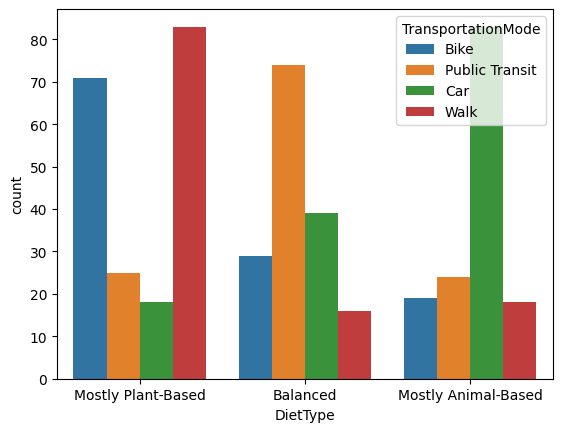

In [12]:
import seaborn as sns
original_df = pd.read_csv("lifestyle_sustainability_data.csv")
sns.countplot(data=original_df, x="DietType", hue="TransportationMode")

# filter with pandas only
# TransportationMode_Car,DietType_Mostly Animal-Based,DisposalMethods_Combination
original_df[(original_df['TransportationMode'] == "Car") & (original_df['DietType'] == "Mostly Animal-Based") & (original_df['DisposalMethods'] == "Combination")]